In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/dataset.csv')

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


In [34]:
gender_stroke_counts = data.groupby('gender')['stroke'].value_counts(normalize=True).unstack()*100
gender_stroke_counts

stroke,0,1
gender,,
Female,98.320670,1.679330
Male,98.013992,1.986008
Other,100.000000,NaN


<Axes: ylabel='gender'>

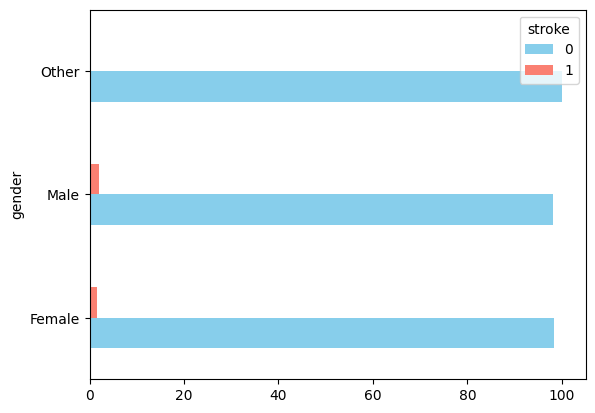

In [36]:
gender_stroke_counts.plot(kind='barh', color=['skyblue', 'salmon'])

In [38]:
smoking_stroke_counts = data.groupby('smoking_status')['stroke'].value_counts(normalize=True).unstack()*100
smoking_stroke_counts

stroke,0,1
smoking_status,,
formerly smoked,97.050581,2.949419
never smoked,98.230860,1.769140
smokes,97.973179,2.026821


<Axes: ylabel='smoking_status'>

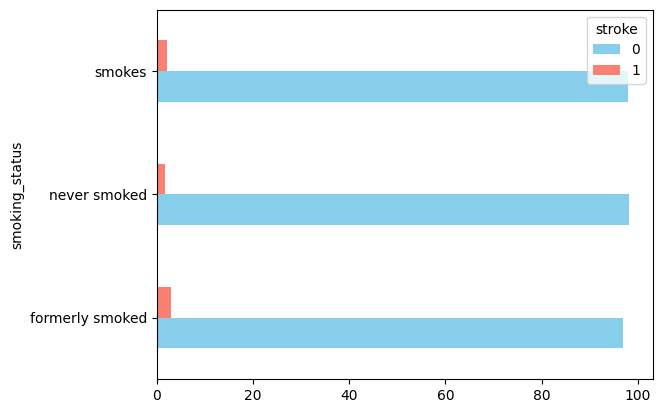

In [39]:
smoking_stroke_counts.plot(kind='barh', color=['skyblue', 'salmon'])

<Axes: >

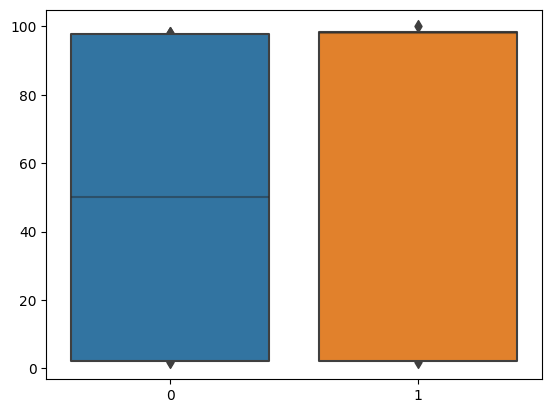

In [59]:
sns.boxenplot([smoking_stroke_counts, gender_stroke_counts])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


from here we can see there are missing values in smoking_status and bmi

I choose to check what to do with these missed values. Here my options: 
1. Drop those people from my training set 
2. Replace the Nan with the mean of the column
3. Replace the Nan with the max of the column
4. Replace the Nan with the most frequent value of the column

In [13]:
target = data['stroke']

Text(0.5, 1.0, 'Percentage of Strokes')

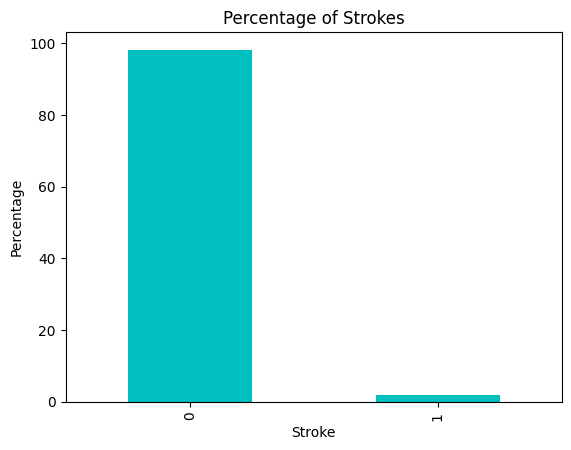

In [24]:
(target.value_counts(normalize=True)*100).plot(kind='bar', color='c')
plt.xlabel('Stroke')
plt.ylabel('Percentage')
plt.title('Percentage of Strokes')

### What an imbalance data :((

In [54]:
first_data = data.drop(['smoking_status', 'bmi'], axis=1)

In [55]:
very_first_x = first_data.drop(['stroke'], axis=1)

In [69]:
very_first_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 3.0+ MB


Now we should conver the categorical data to numericals, which contains: gender, ever_married, work_type, residence_type 

We can convert gender and ever_married to 0 and 1 since they are binary values

In [68]:
replacement_map = {
    'ever_married':{'Yes':1, 'No':0},
    'Residence_type':{'Urban':1, 'Rural':0}
}
very_first_replaced_x = very_first_x.replace(replacement_map)
first_x = pd.get_dummies(very_first_replaced_x, columns=['work_type', 'gender'])

In [70]:
first_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       43400 non-null  int64  
 1   age                      43400 non-null  float64
 2   hypertension             43400 non-null  int64  
 3   heart_disease            43400 non-null  int64  
 4   ever_married             43400 non-null  int64  
 5   Residence_type           43400 non-null  int64  
 6   avg_glucose_level        43400 non-null  float64
 7   work_type_Govt_job       43400 non-null  bool   
 8   work_type_Never_worked   43400 non-null  bool   
 9   work_type_Private        43400 non-null  bool   
 10  work_type_Self-employed  43400 non-null  bool   
 11  work_type_children       43400 non-null  bool   
 12  gender_Female            43400 non-null  bool   
 13  gender_Male              43400 non-null  bool   
 14  gender_Other          

Let's get some information from the data :))